**Sentimental Analysis**

---



# **1. Generate API key**

In [94]:
# call api key
api_key = ''

# **2. Import dependencies**

In [95]:
!pip install emoji
!pip install vaderSentiment
!pip install google-api-python-client

In [150]:
from googleapiclient.discovery import build
import pandas as pd
import re
import emoji
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **3. Fetch comments**

In [97]:
# initialize youtube api
youtube = build('youtube', 'v3', developerKey=api_key)

In [98]:
# input the youtube video link
url = 'https://www.youtube.com/watch?v=avz06PDqDbM'
video_id = url.split('v=')[1]
print(f'Video ID: {video_id}')

Video ID: avz06PDqDbM


In [99]:
# show channel id
video_response = youtube.videos().list(
    part='snippet',
    id=video_id
).execute()

video_response

{'kind': 'youtube#videoListResponse',
 'etag': 'KvqC7ewWTpk3uGHqhDrA2ofo5v0',
 'items': [{'kind': 'youtube#video',
   'etag': 'tHpWx9HKkA9HWVktZxPVE4vSMEQ',
   'id': 'avz06PDqDbM',
   'snippet': {'publishedAt': '2023-05-17T13:00:00Z',
    'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g',
    'title': 'Mission: Impossible – Dead Reckoning Part One | Official Trailer (2023 Movie) - Tom Cruise',
    'description': "Watch the official trailer for #MissionImpossible – Dead Reckoning Part One, starring Tom Cruise. \n\nWatch Mission: Impossible - Dead Reckoning Part One on Digital TODAY: http://paramnt.us/MissionImpossibleDRP1 🏍️ \n\nSign up for EXCLUSIVE content and updates: https://www.missionimpossible.com/signup/ \n\nIn\xa0Mission: Impossible – Dead Reckoning Part One, Ethan Hunt (Tom Cruise) and his IMF team embark on their most dangerous mission yet: To track down a terrifying new weapon that threatens all of humanity before it falls into the wrong hands. With control of the future and the fate 

In [100]:
# get only snippet
video_snippet = video_response['items'][0]['snippet']
video_snippet

{'publishedAt': '2023-05-17T13:00:00Z',
 'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g',
 'title': 'Mission: Impossible – Dead Reckoning Part One | Official Trailer (2023 Movie) - Tom Cruise',
 'description': "Watch the official trailer for #MissionImpossible – Dead Reckoning Part One, starring Tom Cruise. \n\nWatch Mission: Impossible - Dead Reckoning Part One on Digital TODAY: http://paramnt.us/MissionImpossibleDRP1 🏍️ \n\nSign up for EXCLUSIVE content and updates: https://www.missionimpossible.com/signup/ \n\nIn\xa0Mission: Impossible – Dead Reckoning Part One, Ethan Hunt (Tom Cruise) and his IMF team embark on their most dangerous mission yet: To track down a terrifying new weapon that threatens all of humanity before it falls into the wrong hands. With control of the future and the fate of the world at stake, and dark forces from Ethan's past closing in, a deadly race around the globe begins. Confronted by a mysterious, all-powerful enemy, Ethan is forced to consider that nothing can mat

In [101]:
# get channel id
channel_id = video_snippet['channelId']
print(f'Channel ID: {channel_id}')

Channel ID: UCF9imwPMSGz4Vq1NiTWCC7g


In [102]:
# request comments
request = youtube.commentThreads().list(
    part='snippet',
    videoId=video_id,
    maxResults=100
)

response = request.execute()
response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'Fpj713rGv-1eb4m4Kn2ygLnZFf0',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJZ2dHQUFTQlFpSElCZ0FFZ1VJblNBWUFSSUZDSWtnR0FBWUFDSU9DZ3dJLUx6OHFRWVE0TjMxMHdF',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'FPtK20vGLZU68GjB0mcVbyelYes',
   'id': 'UgwtsRFdOSzaxFnAvtl4AaABAg',
   'snippet': {'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g',
    'videoId': 'avz06PDqDbM',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': 'PUy7Ic32Qle4WG6p4TWQTrbpUys',
     'id': 'UgwtsRFdOSzaxFnAvtl4AaABAg',
     'snippet': {'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g',
      'videoId': 'avz06PDqDbM',
      'textDisplay': 'Watch Mission: Impossible - Dead Reckoning Part One on Digital TODAY: <a href="http://paramnt.us/MissionImpossibleDRP1">http://paramnt.us/MissionImpossibleDRP1</a> 🏍',
      'textOriginal': 'Watch Mission: Impossible - Dead Reckoning Part One on Dig

In [103]:
# see only items
data = response['items']
data

[{'kind': 'youtube#commentThread',
  'etag': 'FPtK20vGLZU68GjB0mcVbyelYes',
  'id': 'UgwtsRFdOSzaxFnAvtl4AaABAg',
  'snippet': {'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g',
   'videoId': 'avz06PDqDbM',
   'topLevelComment': {'kind': 'youtube#comment',
    'etag': 'PUy7Ic32Qle4WG6p4TWQTrbpUys',
    'id': 'UgwtsRFdOSzaxFnAvtl4AaABAg',
    'snippet': {'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g',
     'videoId': 'avz06PDqDbM',
     'textDisplay': 'Watch Mission: Impossible - Dead Reckoning Part One on Digital TODAY: <a href="http://paramnt.us/MissionImpossibleDRP1">http://paramnt.us/MissionImpossibleDRP1</a> 🏍',
     'textOriginal': 'Watch Mission: Impossible - Dead Reckoning Part One on Digital TODAY: http://paramnt.us/MissionImpossibleDRP1 🏍',
     'authorDisplayName': '@paramountpictures',
     'authorProfileImageUrl': 'https://yt3.ggpht.com/he07mVZP_5MHsoC6-QXUdtEQANABjRnkxBrjOCBuAwTOxlCO6pgMcS3hAYYPgdZNncFj4WBBdfE=s48-c-k-c0x00ffffff-no-rj',
     'authorChannelUrl': 'http://www.youtube.com/ch

In [104]:
# convert the above data to dataframe
df = pd.DataFrame(data)
df

,kind,etag,id,snippet
0,youtube#commentThread,FPtK20vGLZU68GjB0mcVbyelYes,UgwtsRFdOSzaxFnAvtl4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
1,youtube#commentThread,EE1X-3ZBwrsD4iFFLzEKyLswwBY,UgxSdLWoCgaapCHzKkV4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
2,youtube#commentThread,X4GYSWYv9Y1fkPxdMRkA2TjGYa8,UgwddsVjaMrSsASe9GN4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
3,youtube#commentThread,5i16aTP0q-Nq8RW19MGyR26Ps04,UgzklwEnieImQXmEBRJ4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
4,youtube#commentThread,dWusG-btLgTFJWK9d6trmijGTQE,Ugw6wFfJ90Vxc9CTRD54AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
...,...,...,...,...
95,youtube#commentThread,W62-6h2Bl2QVGbpTfx7LErQ1EzI,Ugwdn0yhNO-qg9xy3u54AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
96,youtube#commentThread,z9GAcQ4oos2h3DZjVYEojYAlxo4,Ugz4SaUH3jjkSbp7kJV4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
97,youtube#commentThread,xb908cUNlwKbji6rvnayUZ2DwUk,Ugz-d_371ZyyP-mC08N4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
98,youtube#commentThread,0UOfzBynUB4b4mfPZauwR1bzyto,UgzpW7xjScoTYgZtTWx4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."


In [105]:
# see only the snippet column
df = pd.DataFrame(list(df['snippet']))
df

,channelId,videoId,topLevelComment,canReply,totalReplyCount,isPublic
0,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"{'kind': 'youtube#comment', 'etag': 'PUy7Ic32Q...",True,11,True
1,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"{'kind': 'youtube#comment', 'etag': 'bqFD0O2Lg...",True,0,True
2,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"{'kind': 'youtube#comment', 'etag': 'DdAVpdKb3...",True,0,True
3,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"{'kind': 'youtube#comment', 'etag': 'u5fqogRV7...",True,0,True
4,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"{'kind': 'youtube#comment', 'etag': '0g_HWOcWv...",True,0,True
...,...,...,...,...,...,...
95,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"{'kind': 'youtube#comment', 'etag': 'Eaf5Ntekc...",True,0,True
96,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"{'kind': 'youtube#comment', 'etag': 'bub9YPt-R...",True,0,True
97,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"{'kind': 'youtube#comment', 'etag': 'Mn_DEdE13...",True,1,True
98,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"{'kind': 'youtube#comment', 'etag': 'hRNsdIX7w...",True,0,True


In [106]:
# see only the top level comment column
df = pd.DataFrame(list(df['topLevelComment']))
df

,kind,etag,id,snippet
0,youtube#comment,PUy7Ic32Qle4WG6p4TWQTrbpUys,UgwtsRFdOSzaxFnAvtl4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
1,youtube#comment,bqFD0O2Lg_9eH8IUSQBUnvbHu80,UgxSdLWoCgaapCHzKkV4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
2,youtube#comment,DdAVpdKb3RWWSNJWGiDVAhUwSzc,UgwddsVjaMrSsASe9GN4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
3,youtube#comment,u5fqogRV74wt2zget5TJklZiiJ8,UgzklwEnieImQXmEBRJ4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
4,youtube#comment,0g_HWOcWvTimsDYi0Pa9DpM7g20,Ugw6wFfJ90Vxc9CTRD54AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
...,...,...,...,...
95,youtube#comment,Eaf5NtekcBoiHqnA8cxE6plksUI,Ugwdn0yhNO-qg9xy3u54AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
96,youtube#comment,bub9YPt-Rlm1wuHuSutlN5z7hWs,Ugz4SaUH3jjkSbp7kJV4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
97,youtube#comment,Mn_DEdE13_wgDITCUHD9KGmfAcc,Ugz-d_371ZyyP-mC08N4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."
98,youtube#comment,hRNsdIX7wWfkXoXGueNkkpMAwRA,UgzpW7xjScoTYgZtTWx4AaABAg,"{'channelId': 'UCF9imwPMSGz4Vq1NiTWCC7g', 'vid..."


In [107]:
# see only the snippet column
df = pd.DataFrame(list(df['snippet']))
df

,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt
0,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,Watch Mission: Impossible - Dead Reckoning Par...,Watch Mission: Impossible - Dead Reckoning Par...,@paramountpictures,https://yt3.ggpht.com/he07mVZP_5MHsoC6-QXUdtEQ...,http://www.youtube.com/channel/UCF9imwPMSGz4Vq...,{'value': 'UCF9imwPMSGz4Vq1NiTWCC7g'},True,none,51,2023-10-10T21:43:30Z,2023-10-10T21:43:30Z
1,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,This is by far one of the best mi movies I eve...,This is by far one of the best mi movies I eve...,@rubelloureiro6241,https://yt3.ggpht.com/ytc/APkrFKZQ79o7yC6P1vsH...,http://www.youtube.com/channel/UC-JX75rS1Czehg...,{'value': 'UC-JX75rS1CzehgsSVs4W-cg'},True,none,0,2023-12-08T01:46:39Z,2023-12-08T01:46:39Z
2,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,Fantastic! Tom Cruise is doing it again!! Hope...,Fantastic! Tom Cruise is doing it again!! Hope...,@mauricevanegeraat7748,https://yt3.ggpht.com/ytc/APkrFKajLnZ4ziUY7wD6...,http://www.youtube.com/channel/UCY0H4N85JA0x7G...,{'value': 'UCY0H4N85JA0x7G3UYfEJYlQ'},True,none,1,2023-12-06T22:19:25Z,2023-12-06T22:20:14Z
3,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,I wonder part of the story derived from TV gam...,I wonder part of the story derived from TV gam...,@user-ps4vy9sq8x,https://yt3.ggpht.com/ytc/APkrFKYXh1Z1CrRFR_uQ...,http://www.youtube.com/channel/UCAEq-bHxLXFaMH...,{'value': 'UCAEq-bHxLXFaMHLxasTpn9Q'},True,none,0,2023-12-06T09:10:25Z,2023-12-06T09:11:27Z
4,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"<a href=""https://www.youtube.com/watch?v=avz06...","1:04\n>""The world's coming after you.""\n>John ...",@Krrrimmi,https://yt3.ggpht.com/qptUkikJhm_-saD8pyIHNi2f...,http://www.youtube.com/channel/UCmS1zVcdamzq5t...,{'value': 'UCmS1zVcdamzq5tM0vT1w0hw'},True,none,0,2023-12-04T07:49:31Z,2023-12-04T07:49:31Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,&quot;America doesn&#39;t need a hero like me ...,"""America doesn't need a hero like me anymore. ...",@TaskeenUddin-wg6oi,https://yt3.ggpht.com/ytc/APkrFKa32FeixqbsYbIZ...,http://www.youtube.com/channel/UCdRDYEnftHfAxs...,{'value': 'UCdRDYEnftHfAxslTonKw9qw'},True,none,0,2023-10-31T07:02:48Z,2023-10-31T07:02:48Z
96,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,&quot;America doesn&#39;t need a hero like me ...,"""America doesn't need a hero like me anymore. ...",@TaskeenUddin-wg6oi,https://yt3.ggpht.com/ytc/APkrFKa32FeixqbsYbIZ...,http://www.youtube.com/channel/UCdRDYEnftHfAxs...,{'value': 'UCdRDYEnftHfAxslTonKw9qw'},True,none,1,2023-10-31T07:00:51Z,2023-10-31T07:00:51Z
97,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,Okay I saw the film and I like it so much but ...,Okay I saw the film and I like it so much but ...,@pearlytemple,https://yt3.ggpht.com/hBjLOYy7xXvyGzgBIkCuEUCv...,http://www.youtube.com/channel/UCP77dEVYF-d4As...,{'value': 'UCP77dEVYF-d4Asn7Q_YcXxw'},True,none,0,2023-10-30T22:58:36Z,2023-11-01T11:52:30Z
98,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"Tom Cruise, you taught me through your movies:...","Tom Cruise, you taught me through your movies:...",@GewoonStijnGewoonStijn,https://yt3.ggpht.com/ytc/APkrFKYp2FrtpiwNa077...,http://www.youtube.com/channel/UC3CoIKzNLZ51m8...,{'value': 'UC3CoIKzNLZ51m8gKIRLkGGg'},True,none,2,2023-10-30T10:49:22Z,2023-10-30T10:49:22Z


In [108]:
# check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   channelId              100 non-null    object
 1   videoId                100 non-null    object
 2   textDisplay            100 non-null    object
 3   textOriginal           100 non-null    object
 4   authorDisplayName      100 non-null    object
 5   authorProfileImageUrl  100 non-null    object
 6   authorChannelUrl       100 non-null    object
 7   authorChannelId        100 non-null    object
 8   canRate                100 non-null    bool  
 9   viewerRating           100 non-null    object
 10  likeCount              100 non-null    int64 
 11  publishedAt            100 non-null    object
 12  updatedAt              100 non-null    object
dtypes: bool(1), int64(1), object(11)
memory usage: 9.6+ KB


*Every column nas no NaN value. And we will use a column called textDisplay.*

---



In [109]:
# show only textDisplay column
comments = df['textDisplay']
comments

0     Watch Mission: Impossible - Dead Reckoning Par...
1     This is by far one of the best mi movies I eve...
2     Fantastic! Tom Cruise is doing it again!! Hope...
3     I wonder part of the story derived from TV gam...
4     <a href="https://www.youtube.com/watch?v=avz06...
                            ...                        
95    &quot;America doesn&#39;t need a hero like me ...
96    &quot;America doesn&#39;t need a hero like me ...
97    Okay I saw the film and I like it so much but ...
98    Tom Cruise, you taught me through your movies:...
99     He is a vampire. That&#39;s why he don&#39;t age
Name: textDisplay, Length: 100, dtype: object

# **4. Filter comments**

In [110]:
# filter the punctuations
hyperlink_pattern = re.compile(
    r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+<br>'
)

In [111]:
# define threshold
threshold_ratio = 0.65

In [112]:
# process comments
relevant_comments = []

for i in comments:
    i = i.lower().strip()
    emojis = emoji.emoji_count(i)

    # count the character (excluding spaces)
    text_characters = len(re.sub(r'\s', '', i))

    if (any(j.isalnum() for j in i)) and not hyperlink_pattern.search(i):
        if emojis == 0 or (text_characters / (text_characters + emojis)) > threshold_ratio:
            relevant_comments.append(i)

relevant_comments[:5]

['watch mission: impossible - dead reckoning part one on digital today: <a href="http://paramnt.us/missionimpossibledrp1">http://paramnt.us/missionimpossibledrp1</a> 🏍',
 'this is by far one of the best mi movies i ever saw, can&#39;t wait for part 2',
 'fantastic! tom cruise is doing it again!! hopefully many more mission: impossible movies.. they are the greatest series of action movies! so much respect for tom cruise, the action hero of my youth, today and tomorrow!',
 'i wonder part of the story derived from tv game&quot;trail into reverie&quot;...',
 '<a href="https://www.youtube.com/watch?v=avz06pdqdbm&amp;t=1m04s">1:04</a><br>&gt;&quot;the world&#39;s coming after you.&quot;<br>&gt;john wick rolling in his grave.']

# **5. Analyze comments**

In [113]:
# calculate sentiment score
def sentiment_scores(comment):
    # initialize the object
    sentiment_object = SentimentIntensityAnalyzer()
    sentiment_dict = sentiment_object.polarity_scores(comment)
    return sentiment_dict['compound']

In [114]:
# try first comment
sentiment_scores(relevant_comments[0])

-0.6486

*Basically it should be neutral.*

---



In [115]:
# initialize empty list
polarity = []
positive_comments = []
negative_comments = []
neutral_comments = []

In [116]:
# append the corresponding sentiment values to associated lists above
print('Analyzing comments ...')

for index, items in enumerate(relevant_comments):
    polarity.append(sentiment_scores(items))

    if float(polarity[-1]) > 0.05:
        sentiment = 'Positive'
        positive_comments.append(items)
    elif float(polarity[-1]) < -0.05:
        sentiment = 'Negative'
        negative_comments.append(items)
    else:
        sentiment = 'Neutral'
        neutral_comments.append(items)

    # add sentiment column to the dataframe
    df.loc[index, 'sentiment'] = sentiment

Analyzing comments ...


In [117]:
# check polarity list
polarity[:5]

[-0.6486, 0.6369, 0.962, 0.0, -0.3818]

In [118]:
# check sentiment column
df['sentiment']

0     Negative
1     Positive
2     Positive
3      Neutral
4     Negative
        ...   
95    Positive
96     Neutral
97     Neutral
98         NaN
99         NaN
Name: sentiment, Length: 100, dtype: object

In [119]:
# check dataframe
df.head()

,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt,sentiment
0,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,Watch Mission: Impossible - Dead Reckoning Par...,Watch Mission: Impossible - Dead Reckoning Par...,@paramountpictures,https://yt3.ggpht.com/he07mVZP_5MHsoC6-QXUdtEQ...,http://www.youtube.com/channel/UCF9imwPMSGz4Vq...,{'value': 'UCF9imwPMSGz4Vq1NiTWCC7g'},True,none,51,2023-10-10T21:43:30Z,2023-10-10T21:43:30Z,Negative
1,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,This is by far one of the best mi movies I eve...,This is by far one of the best mi movies I eve...,@rubelloureiro6241,https://yt3.ggpht.com/ytc/APkrFKZQ79o7yC6P1vsH...,http://www.youtube.com/channel/UC-JX75rS1Czehg...,{'value': 'UC-JX75rS1CzehgsSVs4W-cg'},True,none,0,2023-12-08T01:46:39Z,2023-12-08T01:46:39Z,Positive
2,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,Fantastic! Tom Cruise is doing it again!! Hope...,Fantastic! Tom Cruise is doing it again!! Hope...,@mauricevanegeraat7748,https://yt3.ggpht.com/ytc/APkrFKajLnZ4ziUY7wD6...,http://www.youtube.com/channel/UCY0H4N85JA0x7G...,{'value': 'UCY0H4N85JA0x7G3UYfEJYlQ'},True,none,1,2023-12-06T22:19:25Z,2023-12-06T22:20:14Z,Positive
3,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,I wonder part of the story derived from TV gam...,I wonder part of the story derived from TV gam...,@user-ps4vy9sq8x,https://yt3.ggpht.com/ytc/APkrFKYXh1Z1CrRFR_uQ...,http://www.youtube.com/channel/UCAEq-bHxLXFaMH...,{'value': 'UCAEq-bHxLXFaMHLxasTpn9Q'},True,none,0,2023-12-06T09:10:25Z,2023-12-06T09:11:27Z,Neutral
4,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"<a href=""https://www.youtube.com/watch?v=avz06...","1:04\n>""The world's coming after you.""\n>John ...",@Krrrimmi,https://yt3.ggpht.com/qptUkikJhm_-saD8pyIHNi2f...,http://www.youtube.com/channel/UCmS1zVcdamzq5t...,{'value': 'UCmS1zVcdamzq5tM0vT1w0hw'},True,none,0,2023-12-04T07:49:31Z,2023-12-04T07:49:31Z,Negative


# **6. Overall polarity**

In [120]:
avg_polarity = sum(polarity)/len(polarity)
print("Average Polarity:", avg_polarity)
if avg_polarity > 0.05:
	print("The Video has got a Positive response")
elif avg_polarity < -0.05:
	print("The Video has got a Negative response")
else:
	print("The Video has got a Neutral response")

print("The comment with most positive sentiment:", comments[polarity.index(max(polarity))], "with score", max(polarity), "and length", len(comments[polarity.index(max(polarity))]))
print("The comment with most negative sentiment:", comments[polarity.index(min(
	polarity))], "with score", min(polarity), "and length", len(comments[polarity.index(min(polarity))]))


Average Polarity: 0.2298795918367347
The Video has got a Positive response
The comment with most positive sentiment: ilsa dies lol. with score 0.9868 and length 14
The comment with most negative sentiment: By far, the worst one. Nonsense this movie was. with score -0.7783 and length 47


In [121]:
# show average polarity
avg_polarity = sum(polarity) / len(polarity)
avg_polarity

0.2298795918367347

*Average polarity is 0.2276.*

---



In [122]:
# show its condition
if avg_polarity > 0.05:
    print('The video has got a positive response.')
elif avg_polarity < 0.05:
    print('The video has got a negative response.')
else:
    print('The video has got a neutral response.')

The video has got a positive response.


In [123]:
# show the maximum score comment
print(f'The comment with most positive sentiment: "{comments[polarity.index(max(polarity))]}" with score of "{max(polarity)}".')

The comment with most positive sentiment: "ilsa dies lol." with score of "0.9868".




---



In [124]:
# show the minimum score comment
print(f'The comment with most negative sentiment: "{comments[polarity.index(min(polarity))]}" with score of "{min(polarity)}".')

The comment with most negative sentiment: "By far, the worst one. Nonsense this movie was." with score of "-0.7783".




---



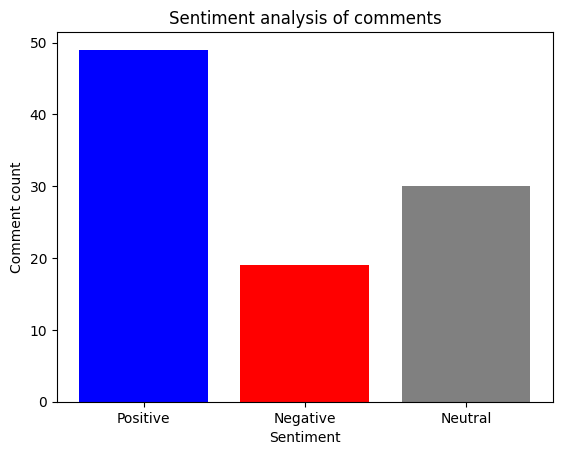

In [125]:
# plot the bar chart to count the number of each sentiment
# set
positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

labels = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]

# plot
plt.bar(labels, comment_counts, color=['blue', 'red', 'grey'])
plt.xlabel('Sentiment')
plt.ylabel('Comment count')
plt.title('Sentiment analysis of comments')
plt.show()

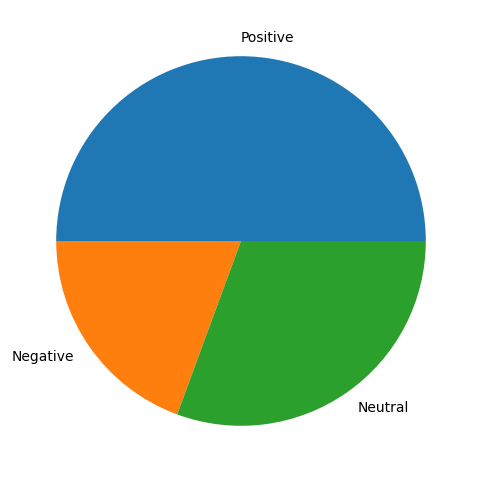

In [126]:
# plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(comment_counts, labels=labels)
plt.show()

In [127]:
# check dataframe again
df.head()

,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt,sentiment
0,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,Watch Mission: Impossible - Dead Reckoning Par...,Watch Mission: Impossible - Dead Reckoning Par...,@paramountpictures,https://yt3.ggpht.com/he07mVZP_5MHsoC6-QXUdtEQ...,http://www.youtube.com/channel/UCF9imwPMSGz4Vq...,{'value': 'UCF9imwPMSGz4Vq1NiTWCC7g'},True,none,51,2023-10-10T21:43:30Z,2023-10-10T21:43:30Z,Negative
1,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,This is by far one of the best mi movies I eve...,This is by far one of the best mi movies I eve...,@rubelloureiro6241,https://yt3.ggpht.com/ytc/APkrFKZQ79o7yC6P1vsH...,http://www.youtube.com/channel/UC-JX75rS1Czehg...,{'value': 'UC-JX75rS1CzehgsSVs4W-cg'},True,none,0,2023-12-08T01:46:39Z,2023-12-08T01:46:39Z,Positive
2,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,Fantastic! Tom Cruise is doing it again!! Hope...,Fantastic! Tom Cruise is doing it again!! Hope...,@mauricevanegeraat7748,https://yt3.ggpht.com/ytc/APkrFKajLnZ4ziUY7wD6...,http://www.youtube.com/channel/UCY0H4N85JA0x7G...,{'value': 'UCY0H4N85JA0x7G3UYfEJYlQ'},True,none,1,2023-12-06T22:19:25Z,2023-12-06T22:20:14Z,Positive
3,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,I wonder part of the story derived from TV gam...,I wonder part of the story derived from TV gam...,@user-ps4vy9sq8x,https://yt3.ggpht.com/ytc/APkrFKYXh1Z1CrRFR_uQ...,http://www.youtube.com/channel/UCAEq-bHxLXFaMH...,{'value': 'UCAEq-bHxLXFaMHLxasTpn9Q'},True,none,0,2023-12-06T09:10:25Z,2023-12-06T09:11:27Z,Neutral
4,UCF9imwPMSGz4Vq1NiTWCC7g,avz06PDqDbM,"<a href=""https://www.youtube.com/watch?v=avz06...","1:04\n>""The world's coming after you.""\n>John ...",@Krrrimmi,https://yt3.ggpht.com/qptUkikJhm_-saD8pyIHNi2f...,http://www.youtube.com/channel/UCmS1zVcdamzq5t...,{'value': 'UCmS1zVcdamzq5tM0vT1w0hw'},True,none,0,2023-12-04T07:49:31Z,2023-12-04T07:49:31Z,Negative


In [129]:
# drop some columns
df = df.drop(columns=['channelId',
             'videoId',
             'textOriginal',
             'authorDisplayName',
             'authorProfileImageUrl',
             'authorChannelUrl',
             'authorChannelId',
             'canRate',
             'viewerRating',
             'publishedAt',
             'updatedAt'], inplace=False)

In [131]:
# check dataframe
df.head()

,textDisplay,likeCount,sentiment
0,Watch Mission: Impossible - Dead Reckoning Par...,51,Negative
1,This is by far one of the best mi movies I eve...,0,Positive
2,Fantastic! Tom Cruise is doing it again!! Hope...,1,Positive
3,I wonder part of the story derived from TV gam...,0,Neutral
4,"<a href=""https://www.youtube.com/watch?v=avz06...",0,Negative


In [132]:
# create a polarity dataframe
df_polarity = pd.DataFrame({'polarity': polarity})
df_polarity

,polarity
0,-0.6486
1,0.6369
2,0.9620
3,0.0000
4,-0.3818
...,...
93,0.7269
94,0.7269
95,0.5803
96,0.0000


In [133]:
# merge new column with the original column
df['polarity'] = df_polarity

In [134]:
# show new dataframe
df

,textDisplay,likeCount,sentiment,polarity
0,Watch Mission: Impossible - Dead Reckoning Par...,51,Negative,-0.6486
1,This is by far one of the best mi movies I eve...,0,Positive,0.6369
2,Fantastic! Tom Cruise is doing it again!! Hope...,1,Positive,0.9620
3,I wonder part of the story derived from TV gam...,0,Neutral,0.0000
4,"<a href=""https://www.youtube.com/watch?v=avz06...",0,Negative,-0.3818
...,...,...,...,...
95,&quot;America doesn&#39;t need a hero like me ...,0,Positive,0.5803
96,&quot;America doesn&#39;t need a hero like me ...,1,Neutral,0.0000
97,Okay I saw the film and I like it so much but ...,0,Neutral,0.0000
98,"Tom Cruise, you taught me through your movies:...",2,NaN,NaN


In [135]:
# chechk NaN data
df.isnull().sum()

textDisplay    0
likeCount      0
sentiment      2
polarity       2
dtype: int64

# **7. Extra**

In [148]:
# use nltk to evaluate sentiment
def mainsentiment(text):
    sid = SentimentIntensityAnalyzer()
    tokens = nltk.word_tokenize(text)

    sentiment_scores = []
    for i in tokens:
        sentiment_scores.append(sid.polarity_scores(i))

    overall_sentiment_score = sum([j['compound'] for j in sentiment_scores]) / len(sentiment_scores)

    return overall_sentiment_score

In [163]:
# try
text = "I am good."
print(f'Overall sentiment score is {mainsentiment(text):.4f}.')
print()

Overall sentiment score is 0.1101.



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
